In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2
from matplotlib.pyplot import figure
%matplotlib inline

In [ ]:
def test_previous_pipeline2(fname):
    test_img = cv2.imread(fname)
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
    undistorted = cal_undistort(test_img)
    binary_img = to_binary_img(undistorted)
    
    color_binary = np.dstack((np.zeros_like(binary_img), binary_img, (np.zeros_like(binary_img)))) * 255
    cv2.polylines(color_binary,[original_pts.astype(int)],True,(255,0,0),3)
    
    masked_binary = apply_mask(binary_img)
    warped_binary= warp(masked_binary)

    color_warped = np.dstack((np.zeros_like(warped_binary), warped_binary, (np.zeros_like(warped_binary)))) * 255
    cv2.polylines(color_warped,[dst_pts.astype(int)],True,(0,0,255),3)

    #Plotting
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(color_binary)
    ax1.set_title('Original Image', fontsize=40)

    ax2.imshow(color_warped)
    ax2.set_title('Perspective Transform Result', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        

### Applying mask to region of interest


In [4]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image


def apply_mask(img):
    imshape = img.shape
    vertices = np.array([[
        (0, imshape[0]),
        (imshape[1]*0.5, imshape[0]*0.57), 
        (imshape[1]*0.5, imshape[0]*0.57), 
        (imshape[1], imshape[0]),
    ]], dtype=np.int32)
    img = region_of_interest(img, vertices)
    return img

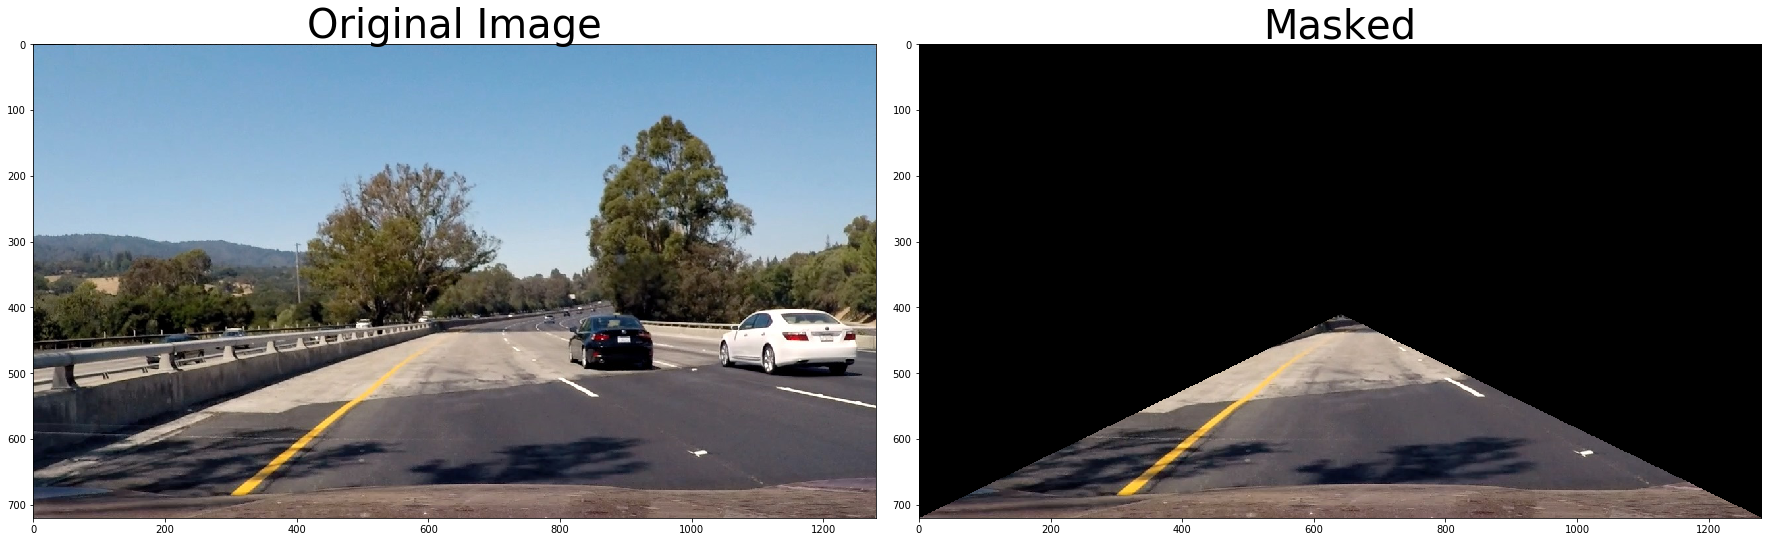

In [5]:
img_to_mask = cv2.imread('test_images/test4.jpg')
img_to_mask = cv2.cvtColor(img_to_mask,cv2.COLOR_BGR2RGB)
masked_image = apply_mask(img_to_mask)

#Plotting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img_to_mask)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(masked_image)
ax2.set_title('Masked', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [8]:
from src.ransac import ransac, LinearLeastSquaresModel

In [4]:
X = np.asarray(range(10))

In [5]:
Y = 2 * X

In [6]:
data = np.asarray([X, Y]).T

In [19]:
model = LinearLeastSquaresModel([0,1,2],[0,1,2])

In [16]:
 ransac(data, model, 3, 10,1,5)

array([[1.]])

In [ ]:
ransac(data,model,n,k,t,d,debug=False,return_all=False):
    """fit model parameters to data using the RANSAC algorithm
    
This implementation written from pseudocode found at
http://en.wikipedia.org/w/index.php?title=RANSAC&oldid=116358182

{{{
Given:
    data - a set of observed data points
    model - a model that can be fitted to data points
    n - the minimum number of data values required to fit the model
    k - the maximum number of iterations allowed in the algorithm
    t - a threshold value for determining when a data point fits a model
    d - the number of close data values required to assert that a model fits well to data
Return:

In [14]:
range(1)

range(0, 1)

In [21]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2)

In [26]:
x_ = X.reshape((-1, 1))
y_ = Y.reshape((-1, 1))

In [24]:
x_2 = poly_2.fit_transform(x_)

In [25]:
x_2

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

In [27]:
m = linear_model.RANSACRegressor(linear_model.LinearRegression())
f = m.fit(x_2, y_)

In [28]:
f

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [30]:
m.estimator_.coef_

array([[ 0.00000000e+00,  2.00000000e+00, -2.22044605e-16]])

In [31]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
X[:,np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [33]:
X = [[0.44, 0.68], [0.99, 0.23]]

In [34]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

In [35]:
X_

array([[1.    , 0.44  , 0.68  , 0.1936, 0.2992, 0.4624],
       [1.    , 0.99  , 0.23  , 0.9801, 0.2277, 0.0529]])

In [36]:
'left_fit {}'.format([1.123,2.123,2.1233])

'left_fit [1.123, 2.123, 2.1233]'

In [37]:
left_fit = [1,2,3]
right_fit = [2,3,4]
left = np.poly1d(left_fit)
right = np.poly1d(right_fit)
y = np.linspace(0, 70, 10)

In [38]:
y

array([ 0.        ,  7.77777778, 15.55555556, 23.33333333, 31.11111111,
       38.88888889, 46.66666667, 54.44444444, 62.22222222, 70.        ])

In [43]:
max(abs(left(y)-right(y)))

4971.0

In [17]:
a= [2,-1,4]
b = [10,10,10]
c = [3,3,3]
d = [3,5,3]
e = [6,5,1]


np.minimum(a,c)

array([ 2, -1,  3])

In [14]:
np.log(abs(np.divide(a,b)))

array([-1.60943791, -2.30258509, -0.91629073])

In [21]:
import collections
q = collections.deque(maxlen=3)
q.append(a)
q.append(b)
q.append(c)
q.append(e)

np.minimum.reduce(q)

array([3, 3, 1])

In [22]:
np.polyfit(a,b,2,full=True)

(array([ 7.24293591e-16, -1.93816421e-15,  1.00000000e+01]),
 array([], dtype=float64),
 3,
 array([1.5942757 , 0.63859189, 0.22468953]),
 6.661338147750939e-16)

In [5]:
np.average([1,2,3,4])

2.5

In [7]:
np.

<function numpy.core.einsumfunc.einsum(*operands, **kwargs)>

In [8]:
([1,2,3]+[3,4,5])/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [9]:
(np.array([1,2,3])+np.array([3,4,5]))/2

array([2., 3., 4.])

In [5]:
import math

In [10]:
0.5**math.tanh(.3)

0.8171582421929264

In [12]:
1.5**math.tanh(1.3)

1.4182144828210148

In [20]:
import numpy as np
y = np.array([1,2,3,100])

In [29]:
av = 3
(y/av)**np.exp(-1*((y-av)/av)**2)

array([0.49440085, 0.69570739, 1.        , 1.        ])

In [22]:
math.tanh(100)

1.0